<a href="https://colab.research.google.com/github/jozuniga13/PHYS_141_Midterm/blob/main/PYTUT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello world")


hello world


In [3]:
import numpy as np
a = np.array([[1, 2, 3],
              [2, 3, 2],
              [1, 1, 2],
              [2, 2, 2]])
a.shape

(4, 3)

In [4]:
b = np.array([[1],
              [2], 
              [1]])
b.shape

(3, 1)

In [5]:
%%time
a@b

CPU times: user 48 µs, sys: 0 ns, total: 48 µs
Wall time: 52.7 µs


array([[ 8],
       [10],
       [ 5],
       [ 8]])

In [8]:
from scipy.special import hermite
from math import factorial

def E(v):
    '''Eigenvalues in units of h'''
    return (v + 0.5)

def V(x):
    """Potential energy function"""
    return 0.5 * x ** 2

def N(v):
    '''Normalization constant '''
    return 1. / np.sqrt(np.sqrt(np.pi) * 2 ** v * factorial(v))

def psi(v, x):
    """Harmonic oscillator wavefunction for level v computed on grid of points x"""
    Hr=hermite(v)
    Psix = N(v) * Hr(x) * np.exp(-0.5 * x ** 2)
    return Psix


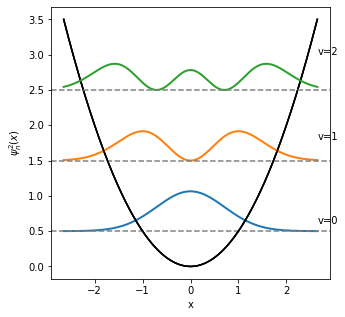

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot up to level vmax
VMAX=3

# Range of x determine by classical tunring points:
xmin, xmax = -np.sqrt(2 * E(VMAX)), np.sqrt(2 * E(VMAX))
x = np.linspace(xmin, xmax, 10000)
fig, ax = plt.subplots(figsize=(5,5))
for v in range(VMAX):     
    # plot potential V(x)
    ax.plot(x, V(x), color='black')
    # plot psi squared which we shift up by values of energy
    ax.plot(x, psi(v,x) ** 2 + E(v), lw=2)
    # add lines and labels
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(xmax, 1.2 * E(v), f"v={v}")
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')
plt.show()

In [6]:
X0 = -4
XD = 4
ND = 600
DELTAT = 2 * np.pi / 128

x = np.linspace(X0, XD, ND + 1)

In [7]:
def func_K(xb, xa):
    part1 = np.sqrt(1 / (2 * np.pi * 1j * DELTAT))
    part2 = np.exp(1j * (xb - xa)**2 / (2 * DELTAT))
    return part1 * part2


K = np.zeros((ND + 1, ND + 1), dtype = np.complex64)
for i in range(ND + 1):
    for j in range(ND + 1):
        K[i, j] = func_K(x[i], x[j])
print(K)

[[ 1.2732395 -1.2732395j  1.2755431 -1.2709318j  1.2824285 -1.2639837j
  ...  1.6629561 -0.6905467j -0.3633425 +1.763593j
  -1.2498943 -1.2961645j]
 [ 1.2755431 -1.2709318j  1.2732395 -1.2732395j  1.2755431 -1.2709318j
  ... -1.5021374 -0.9929053j  1.6629561 -0.6905467j
  -0.3633425 +1.763593j ]
 [ 1.2824285 -1.2639837j  1.2755431 -1.2709318j  1.2732395 -1.2732395j
  ...  0.00982709+1.8006058j -1.5021374 -0.9929053j
   1.6629561 -0.6905467j]
 ...
 [ 1.6629561 -0.6905467j -1.5021374 -0.9929053j  0.00982709+1.8006058j
  ...  1.2732395 -1.2732395j  1.2755431 -1.2709318j
   1.2824285 -1.2639837j]
 [-0.3633425 +1.763593j   1.6629561 -0.6905467j -1.5021374 -0.9929053j
  ...  1.2755431 -1.2709318j  1.2732395 -1.2732395j
   1.2755431 -1.2709318j]
 [-1.2498943 -1.2961645j -0.3633425 +1.763593j   1.6629561 -0.6905467j
  ...  1.2824285 -1.2639837j  1.2755431 -1.2709318j
   1.2732395 -1.2732395j]]
